<a href="https://colab.research.google.com/github/misbahEffendy/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-4/blob/main/Case_Study_02_Data_Mining_UIN_Ganjil_2022_Kelompok_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<h1><center>MixITup Ice Cream</center></h1>

MixITup adalah perusahan yang bergerak di bidang usaha Ice Cream, Boba Drinks, dan Desserts (snacks). Saat ini MixITup memiliki 3 cabang di Jakarta, Depok, dan Tangerang. Rencananya MixITup ingin memperluas bisnisnya ke kota lain dan melakukan massive marketing.

Melalui data pelanggan yang berhasil dikumpulkan, akan dilakukan proses Data Mining lalu mendapatkan informasi/insight dan saran/rekomendasi/strategi ke perusahaan.

Salah satu teknik yang bisa dilakukan adalah dengan melakukan **segmentasi pelanggan**. Yaitu dengan mengelompokkan pelanggan-pelanggan yang ada berdasarkan kesamaan karakter dari pelanggan tersebut. Untuk melakukan hal tersebut akan digunakan teknik *unsupervised machine learning*.

*Salah satu teknik yang dapat digunakan adalah pengaplikasian machine learning menggunakan algoritma K-Prototypes. Algoritma K-Prototypes merupakan gabungan dari K-Means dan juga K-Modes yang dapat digunakan untuk melakukan segmentasi dengan data.*

# Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import numpy as np

In [2]:
import warnings; warnings.simplefilter('ignore')

In [3]:
!pip install kmodes

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [4]:
from kmodes.kmodes import KModes
from kmodes.kprototypes import KPrototypes

In [5]:
import pickle

Masalah ini akan dapat diselesakan dengan bantuan beberapa library sebagai berikut:


*   **Pandas**, digunakan untuk melakukan pemroresan analisis data
*   **Matplotlib**, digunakan sebagai dasar untuk melakukan visualisasi data

*   **Seaborn**, digunakan di atas matplotlib untuk melakukan visualisasi data yang lebih menarik
*   **Scikit - Learn**, digunakan untuk mempersiapkan data sebelum dilakukan permodelan





# Load Data

Langkah pertama yang perlu dilakukan adalah membaca data tersebut yang semula adalah *textfile* menjadi pandas dataframe. Menggunakan fungsi ***read_csv*** yang ada di pandas untuk memasukkan data.

In [6]:
!mkdir data
!wget -P data/ https://raw.githubusercontent.com/misbahEffendy/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-4/main/Case-Study-02-MixITup.csv

--2022-10-12 08:41:22--  https://raw.githubusercontent.com/misbahEffendy/Case-Study-02-Data-Mining-UIN-Ganjil-2022-Kelompok-4/main/Case-Study-02-MixITup.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 9107 (8.9K) [text/plain]
Saving to: ‘data/Case-Study-02-MixITup.csv’

Case-Study-02-MixIT 100%[===================>]   8.89K  --.-KB/s    in 0s      

2022-10-12 08:41:22 (58.7 MB/s) - ‘data/Case-Study-02-MixITup.csv’ saved [9107/9107]



In [7]:
df = pd.read_csv("data/Case-Study-02-MixITup.csv", low_memory = False, encoding='utf8')

In [8]:
df

,ID,Jenis Kelamin,Umur,Pendapatan-per-bulan,skor-pengeluaran,Menikah,Kota,Promo,HariFav,FavFlavor
0,101,Wanita,49,13114754,52,1,Jakarta,1.0,Sabtu,2
1,102,Wanita,32,33606557,86,1,Depok,1.0,Minggu,6
2,103,Pria,51,15983606,41,1,Jakarta,2.0,Minggu,3
3,104,Pria,19,12704918,55,0,Jakarta,1.0,Rabu,7
4,105,Wanita,38,20081967,42,1,Jakarta,2.0,Senin,8
...,...,...,...,...,...,...,...,...,...,...
192,296,Pria,31,4098360,73,1,Depok,1.0,Senin,0
193,297,Pria,57,15983606,51,1,Jakarta,1.0,Minggu,5
194,298,Wanita,35,43032786,79,1,Depok,1.0,Senin,7
195,299,Wanita,23,1229508,94,1,Depok,0.0,Selasa,0


# Data Understanding

In [9]:
df.drop('ID', axis = 1, inplace = True)

Selanjutnya perlu melihat informasi dari data yang ada sehingga dapat mengetahui jumlah baris dan kolom, nama kolom, identifikasi *null values*,  dan juga mengetahui tipe data dengan menggunakan fungsi ***info()*** dari pandas.



In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 197 entries, 0 to 196
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         192 non-null    object 
 1   Umur                  197 non-null    int64  
 2   Pendapatan-per-bulan  197 non-null    int64  
 3   skor-pengeluaran      197 non-null    int64  
 4   Menikah               184 non-null    object 
 5   Kota                  197 non-null    object 
 6   Promo                 191 non-null    float64
 7   HariFav               197 non-null    object 
 8   FavFlavor             197 non-null    int64  
dtypes: float64(1), int64(4), object(4)
memory usage: 14.0+ KB


In [11]:
df.shape

(197, 9)

In [12]:
# Mengubah tipe data object/int64 menjadi category

df['Jenis Kelamin'] = df['Jenis Kelamin'].astype('category')
df['Menikah'] = df['Menikah'].astype('category')
df['Kota'] = df['Kota'].astype('category')
df['Promo'] = df['Promo'].astype('category')
df['HariFav'] = df['HariFav'].astype('category')
df['FavFlavor'] = df['FavFlavor'].astype('category')

Setelah melakukan pemanggilan data dan melihat informasi data, diketahui bahwa:
*   Data yang akan digunakan terdiri dari 200 baris dan 9 kolom
*   Terdapat nilai *null* pada data
*   3 kolom memiliki tipe data numerik dan 6 kolom memiliki tipe data kategorik

**Tips:** Dalam setiap *project*, harus dipahami informasi dasar dari data yang dimiliki sebelum melakukan analisa lebih lanjut yang bertujuan memastikan tipe data dari masing-masing kolom sudah benar, mengetahui apakah ada data *null* di tiap kolom, dan juga mengetahui nama-nama kolom di dataset yang digunakan. Informasi ini nantinya akan menentukan proses apa yang perlu dilakukan selanjutnya.

In [13]:
df.corr()

,Umur,Pendapatan-per-bulan,skor-pengeluaran
Umur,1.000000,0.047148,-0.338672
Pendapatan-per-bulan,0.047148,1.000000,0.002795
skor-pengeluaran,-0.338672,0.002795,1.000000


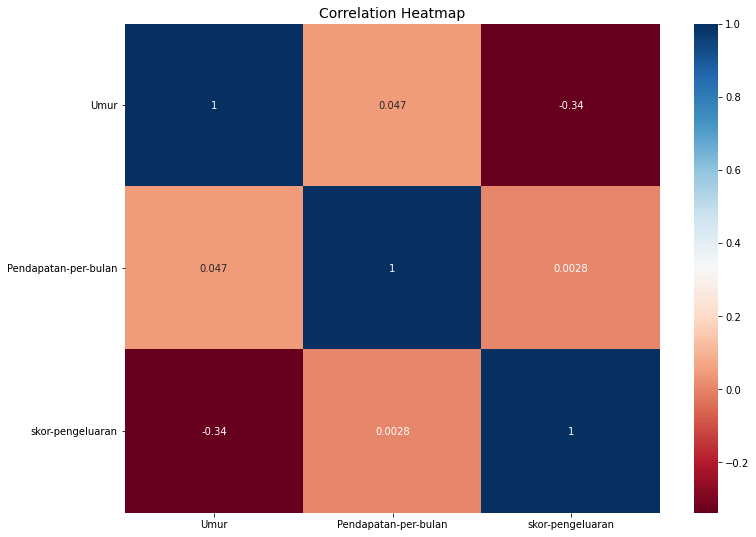

In [14]:
plt.figure(figsize=(12,9))
sns.heatmap(df.corr(),annot=True,cmap='RdBu')
plt.title('Correlation Heatmap',fontsize=14)
plt.yticks(rotation =0)
plt.show()

Interpretasi heatmap

# Data Preprocessing

Diketahui pada tahap sebelumnya bahwa terdapat nilai *null* pada data yang menandakan data ini belum benar-benar bersih dan baik untuk dilakukan analisa lebih lanjut. Maka dari itu, akan dilakukan *data preprocessing* untuk memastikan data yang dimiliki sudah baik untuk dilakukan proses selanjutnya.

Missing Value

In [15]:
df.isnull().sum()

Jenis Kelamin            5
Umur                     0
Pendapatan-per-bulan     0
skor-pengeluaran         0
Menikah                 13
Kota                     0
Promo                    6
HariFav                  0
FavFlavor                0
dtype: int64

In [16]:
df.dropna(subset = ['Jenis Kelamin', 'Menikah', 'Promo'], inplace = True)

Terdapat missing value pada variabel : 
1.   Jenis kelamin
2.   Menikah 
3.   Promo
Karena jumlah missing value pada ketiga variabel di atas terbilang cukup sedikit maka dapat diatasi dengan menghapus missing value tersebut.





In [17]:
df.isnull().sum()

Jenis Kelamin           0
Umur                    0
Pendapatan-per-bulan    0
skor-pengeluaran        0
Menikah                 0
Kota                    0
Promo                   0
HariFav                 0
FavFlavor               0
dtype: int64

In [18]:
df.shape

(173, 9)

Treatment MV; fillna/imputasi, dropna/apus

Duplicated Data

In [19]:
df.duplicated().sum()

0

Interpretasi duplikat

# Eksplorasi Data

Pada tahap sebelumnya sudah dilakukan memasukkan data, melihat informasi dasar dari data, dan *data preprocessing*.

Selanjutnya perlu dilakukan eksplorasi data untuk lebih mengenal dataset yang akan digunakan. Akan dilakukan eksplorasi untuk data numerik dan juga data kategorik.

## Eksplorasi Data Numerik

In [20]:
kolom_numerik = ['Umur', 'Pendapatan-per-bulan', 'skor-pengeluaran']

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

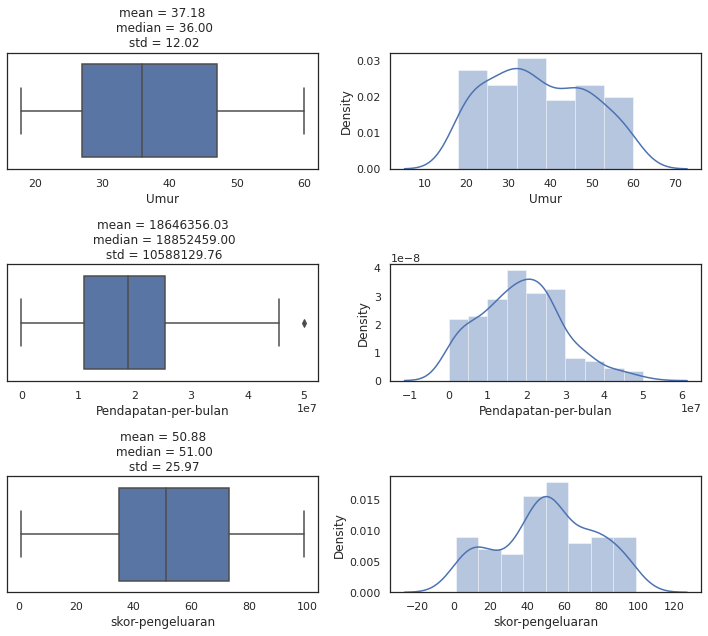

In [21]:
sns.set(style='white')
plt.clf()
  
# Fungsi untuk membuat plot  
def observasi_num(features):  
    fig, axs = plt.subplots(3, 2, figsize=(10, 9))
    for i, kol in enumerate(features):
	    p1=sns.boxplot(df[kol], ax = axs[i][0])
	    p2=sns.distplot(df[kol], ax = axs[i][1])   
	    axs[i][0].set_title('mean = %.2f\n median = %.2f\n std = %.2f'%(df[kol].mean(), df[kol].median(), df[kol].std()))
    plt.setp(axs)
    plt.tight_layout()
    plt.show()  
  
# Memanggil fungsi untuk membuat Plot untuk data numerik  
observasi_num(kolom_numerik)

Dapat dilihat bahwa kebanyakan dari para customer memiliki rentang usia tertinggi mulai dari 20-40 tahun. dan yang

## Eksplorasi Data Kategorik

In [22]:
kolom_kategorik = ['Jenis Kelamin','Menikah','Kota', 'Promo', 'HariFav', 'FavFlavor']  

  adjustable: {'box', 'datalim'}
  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: float or None
  anchor: 2-tuple of floats or {'C', 'SW', 'S', 'SE', ...}
  animated: bool
  aspect: {'auto', 'equal'} or num
  autoscale_on: bool
  autoscalex_on: bool
  autoscaley_on: bool
  axes_locator: Callable[[Axes, Renderer], Bbox]
  axisbelow: bool or 'line'
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  contains: callable
  facecolor: color
  fc: color
  figure: `.Figure`
  frame_on: bool
  gid: str
  in_layout: bool
  label: object
  navigate: bool
  navigate_mode: unknown
  path_effects: `.AbstractPathEffect`
  picker: None or bool or float or callable
  position: [left, bottom, width, height] or `~matplotlib.transforms.Bbox`
  prop_cycle: unknown
  rasterization_zorder: float or None
  rasterized: bool or None
  sketch_params: (scale: float, length: float, randomness: float)
  sna

<Figure size 432x288 with 0 Axes>

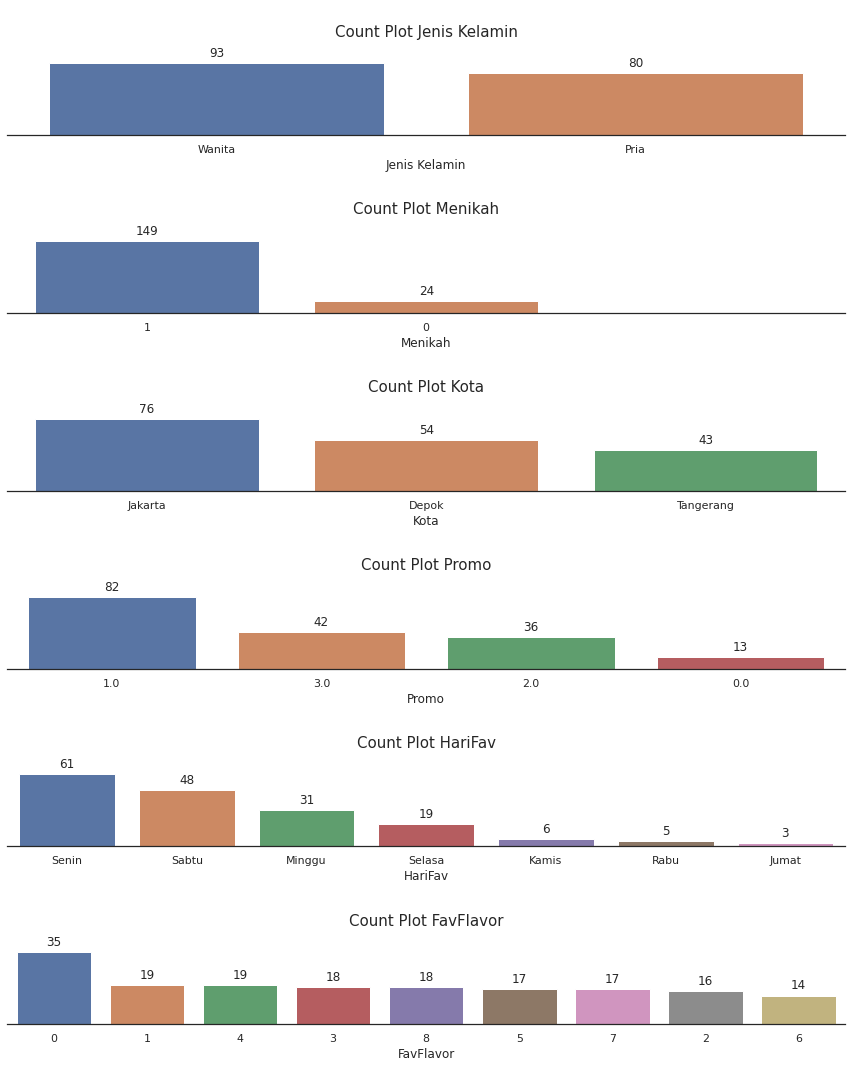

In [23]:
sns.set(style='white')
plt.clf()

# Membuat canvas
fig, axs = plt.subplots(6,1,figsize=(12,15)) 

# Membuat plot untuk setiap kolom kategorikal  
for i, kol2 in enumerate(kolom_kategorik):  
    # Membuat Plot
    sns.countplot(df[kol2], order = df[kol2].value_counts().index, ax = axs[i])  
    axs[i].set_title('\nCount Plot %s\n'%(kol2), fontsize=15)  
      
    # Memberikan anotasi  
    for p in axs[i].patches:  
        axs[i].annotate(format(p.get_height(), '.0f'),  
                        (p.get_x() + p.get_width() / 2., p.get_height()),  
                        ha = 'center',  
                        va = 'center',  
                        xytext = (0, 10),  
                        textcoords = 'offset points') 
          
    # Setting Plot  
    sns.despine(right=True,top = True, left = True)  
    axs[i].axes.yaxis.set_visible(False) 
    plt.setp(axs)
    plt.tight_layout()

# Tampilkan plot
plt.show()

Berdasarkan output didapat bahwa kebanyakan dari para customer berjenis kelamin wanita. Dan kebanyakan dari para customer sudah menikah. Dan penjualan MixITup tertinggi berada di daerah Jakarta. Kebanyakan dari customer jarang menggunakan promo dan penjualan terbanyak ada pada hari Senin. Rasa ice cream yang paling banyak dipilih customer adalah rasa Vaanilla.
Dari output diatas didapat beberapa rekomendasi, yaitu :
1. Untuk meningkatkan customer wanita, perusahaan dapat menyediakan tempat yang instragamable. Dan untuk meningkatkan customer pria, perusahaan dapat membuat menu dengan rasa coffee dan menyediakan smoking area.
2. Karena kebanyakan dari para customer sudah menikah, perusahaan dapat membuat atau menawarkan paket keluarga.
3. Untuk meningkatkan pendaftaran loyality program, perusahaan dapat memberikan promo khusus/benefit bagi customer yang memiliki kartu loyality program agar banyak yang tertarik untuk membuat kartu loyality program tersebut.
4. Untuk mengatasi promo yang jarang dipakai oleh customer, dapat diatasi dengan cara sounding promo di berbagai media dan dapat meminta pelayan untuk memberitahu setiap customer yang datang ke toko terkait promo yang tersedia. Dan juga membuat iklan promo yang menarik.
5. Untuk meningkatkan penggunaan kartu loyality program di hari selain hari Senin, sebaiknya perusahaan mengadakan promo khusus untuk hari-hari tertentu bagi customer yang memiliki kartu loyality program.
6. Untuk meningkatkan penjualan rasa ice cream selain rasa Vanilla, sebaiknya perusahaan mengadakan promo khusus untuk beberapa rasa ice cream tertentu. Dan dapat juga membuat paket hemat dengan rasa ice cream yang di mix dengan rasa Vanilla.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 196
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         173 non-null    category
 1   Umur                  173 non-null    int64   
 2   Pendapatan-per-bulan  173 non-null    int64   
 3   skor-pengeluaran      173 non-null    int64   
 4   Menikah               173 non-null    category
 5   Kota                  173 non-null    category
 6   Promo                 173 non-null    category
 7   HariFav               173 non-null    category
 8   FavFlavor             173 non-null    category
dtypes: category(6), int64(3)
memory usage: 11.8 KB


# Standarisasi Kolom Numerik

In [25]:
# Statistik sebelum Standarisasi
print('Statistik sebelum Standarisasi\n')
print(df[kolom_numerik ].describe().round(1))

# Standarisasi
df_std = StandardScaler().fit_transform(df[kolom_numerik])

# Membuat DataFrame
df_std = pd.DataFrame(data=df_std, index=df.index, columns=df[kolom_numerik].columns)

# Menampilkan contoh isi data dan summary statistik
print('\nHasil Standarisasi\n')
print(df_std.head())

print('\nStatistik Hasil Standarisasi\n')
print(df_std.describe().round(0))

Statistik sebelum Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  173.0                 173.0             173.0
mean    37.2            18646356.0              50.9
std     12.0            10588129.8              26.0
min     18.0                   0.0               1.0
25%     27.0            11065573.0              35.0
50%     36.0            18852459.0              51.0
75%     47.0            25409836.0              73.0
max     60.0            50000000.0              99.0

Hasil Standarisasi

       Umur  Pendapatan-per-bulan  skor-pengeluaran
0  0.986029             -0.523951          0.043082
1 -0.432020              1.417023          1.356086
2  1.152858             -0.252214         -0.381713
3 -1.516411             -0.562770          0.158936
4  0.068468              0.135980         -0.343095

Statistik Hasil Standarisasi

        Umur  Pendapatan-per-bulan  skor-pengeluaran
count  173.0                 173.0             173.0
mean     0.0         

Dapat dilihat setelah dilakukan standardisasi nilai mean dan standard deviasi setiap variabel menjadi 0 dan 1. Hal ini menunjukan bahwa data kita sudah dalam skala yang sama.

# Konversi Kategorik Data dengan Label Encoder

In [26]:
# Membuat salinan data frame
df_encode = df[kolom_kategorik].copy()

# Melakukan labelEncoder untuk semua kolom kategorik
for col in kolom_kategorik:
    df_encode[col] = LabelEncoder().fit_transform(df_encode[col])

# Menampilkan data
print(df_encode.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor
0              1        1     1      1        4          2
1              1        1     0      1        2          6
2              0        1     1      2        2          3
3              0        0     1      1        3          7
4              1        1     1      2        6          8


# Persiapan Data Model

In [27]:
# Menggabungkan data frame
df_model = df_encode.merge(df_std, left_index = True, right_index=True, how = 'left')
print(df_model.head())

   Jenis Kelamin  Menikah  Kota  Promo  HariFav  FavFlavor      Umur  \
0              1        1     1      1        4          2  0.986029   
1              1        1     0      1        2          6 -0.432020   
2              0        1     1      2        2          3  1.152858   
3              0        0     1      1        3          7 -1.516411   
4              1        1     1      2        6          8  0.068468   

   Pendapatan-per-bulan  skor-pengeluaran  
0             -0.523951          0.043082  
1              1.417023          1.356086  
2             -0.252214         -0.381713  
3             -0.562770          0.158936  
4              0.135980         -0.343095  


In [28]:
df_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 196
Data columns (total 9 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Jenis Kelamin         173 non-null    int64  
 1   Menikah               173 non-null    int64  
 2   Kota                  173 non-null    int64  
 3   Promo                 173 non-null    int64  
 4   HariFav               173 non-null    int64  
 5   FavFlavor             173 non-null    int64  
 6   Umur                  173 non-null    float64
 7   Pendapatan-per-bulan  173 non-null    float64
 8   skor-pengeluaran      173 non-null    float64
dtypes: float64(3), int64(6)
memory usage: 17.6 KB


# Clustering

Mencari Jumlah Cluster yang Optimal

Salah satu parameter penting yang harus dimasukkan pada algoritma kprototype adalah jumlah cluster yang diinginkan. Oleh karena itu, kamu perlu mencari jumlah cluster yang optimal. Salah satu cara untuk mendapatkan nilai optimal tersebut adalah dengan menggunakan bantuan 'elbow plot'.

Elbow plot ini dapat dibuat dengan cara memvisualisasikan total jarak seluruh data kita ke pusat cluster-nya. Selanjutnya kita memilih titik siku dari pola yang terbentuk dan menjadikannya sebagai jumlah cluster kita.

Untuk melakukan hal ini kamu perlu menjalankan algoritma kprototypes dengan berbagai jumlah cluster. Selanjutnya kamu juga menyimpan nilai cost_ dan memvisualisasikannya dengan line plot atau point plot.

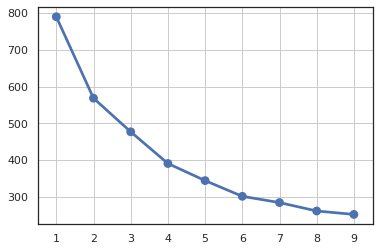

In [29]:
# Melakukan Iterasi untuk mendapatkan nilai Cost
cost = {}
for k in range(1,10):
  kproto = KPrototypes(n_clusters = k, random_state = 75)
  kproto.fit_predict(df_model, categorical = [0,1,2,3,4,5])
  cost[k] = kproto.cost_

# Memvisualisasikan Elbow Plot
sns.pointplot(x = list(cost.keys()), y = list(cost.values()))
plt.grid()
plt.show()

Dari output diatas, garis mengalami patahan yang membentuk elbow atau siku pada saat k = 4 5 6. Maka dengan menggunakan metode ini diperoleh k optimal pada saat berada di k = 4. Untuk menjadi pembanding, dilakukan uji yang lainnya.Berdasarkan output di atas didapat nilai k yang optimal 

Membuat Model

In [30]:
kproto = KPrototypes(n_clusters = 4, random_state = 75)
kproto = kproto.fit(df_model, categorical = [0,1,2,3])

#Save Model
pickle.dump(kproto, open('cluster.pkl', 'wb'))

Menggunakan Model

In [31]:
# Menentukan segmen tiap pelanggan
clusters = kproto.predict(df_model, categorical = [0,1,2,3])
print('Segmen Pelanggan: {}\n'.format(clusters))

# Menggabungkan data awal dan segmen pelanggan
df_final = df.copy()
df_final['cluster'] = clusters
print(df_final.head(15))

Segmen Pelanggan: [1 0 1 0 2 3 2 3 2 2 1 2 1 1 0 1 2 2 1 1 0 3 3 3 2 2 3 1 0 3 2 3 3 0 2 3 3
 3 3 0 3 0 3 0 3 0 1 1 1 1 3 1 1 2 1 1 0 1 3 0 3 2 1 1 1 1 2 0 1 1 3 2 3 1
 2 1 0 1 2 1 3 0 1 3 1 0 1 0 1 1 1 1 3 2 2 0 2 3 2 1 1 1 0 3 1 0 3 2 1 3 0
 2 0 3 2 2 2 2 3 3 2 0 3 0 2 1 2 0 3 0 3 3 3 1 3 2 1 3 2 3 1 3 1 2 2 2 1 2
 0 1 2 2 2 2 2 2 1 3 1 2 3 2 3 1 0 3 2 1 3 0 2 3 0]

   Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0         Wanita    49              13114754                52       1   
1         Wanita    32              33606557                86       1   
2           Pria    51              15983606                41       1   
3           Pria    19              12704918                55       0   
4         Wanita    38              20081967                42       1   
5         Wanita    33              29098360                95       1   
6           Pria    27              21311475                56       1   
7         Wanita    24               

Menampilkan Cluster Tiap Pelanggan

Setelah digabungkan data awal pelanggan dan cluster-nya, perlu untuk menampilkan dan mengobservasi hasilnya untuk membantu dalam memberi nama tiap cluster berdasarkan karakteristiknya.

In [32]:
# Menampilkan data pelanggan berdasarkan clusternya  
for i in range (0,5):
    print('\nPelanggan Cluster: {}\n'.format(i))
    print(df_final[df_final['cluster'] == i])


Pelanggan Cluster: 0

    Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
1          Wanita    32              33606557                86       1   
3            Pria    19              12704918                55       0   
16         Wanita    32              25000000                87       1   
23           Pria    39              22950819                75       1   
31         Wanita    36              28688524                75       1   
37           Pria    48              18442622                49       1   
44           Pria    59              15983606                47       1   
47         Wanita    40              18442622                40       1   
49           Pria    49              19262295                56       1   
51         Wanita    49              20491803                59       1   
62         Wanita    54              13114754                59       1   
66         Wanita    60              14344262                49       1   
74

Visualisasi Hasil Clustering - Box Plot

Kamu juga membuat visualisasi hasil clustering untuk dapat memudahkan kamu melakukan penamaan di tiap-tiap cluster.

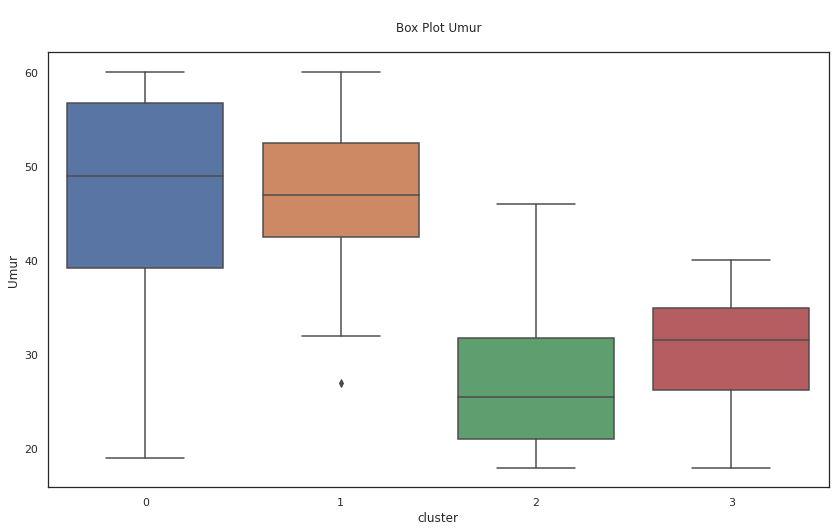

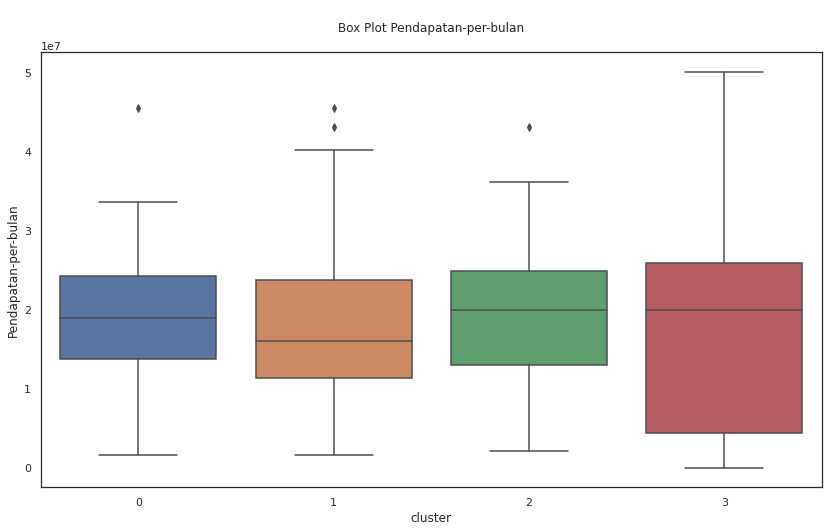

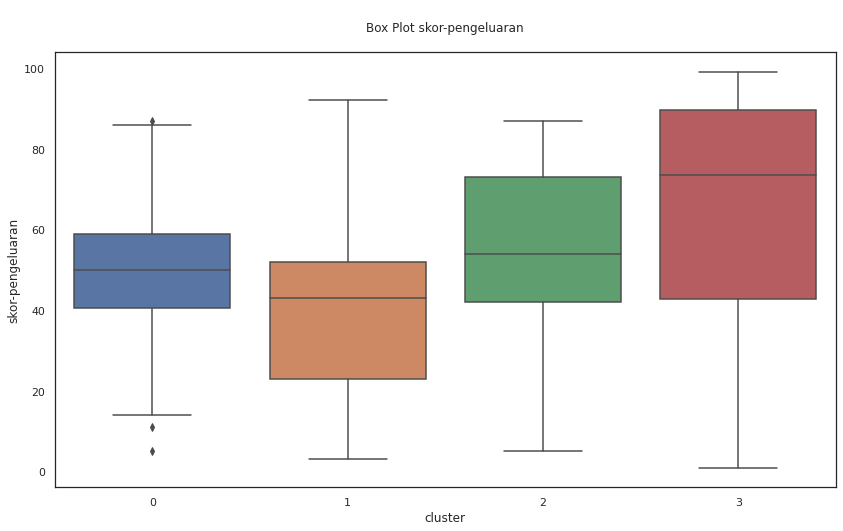

In [34]:
for i in kolom_numerik:
    plt.figure(figsize=(14,8))
    ax = sns.boxplot(x = 'cluster',y = i, data = df_final)
    plt.title('\nBox Plot {}\n'.format(i), fontsize=12)
    plt.show()

Visualisasi Hasil Clustering - Count Plot

Kamu juga membuat visualisasi hasil clustering untuk dapat memudahkan kamu melakukan penamaan di tiap-tiap cluster.

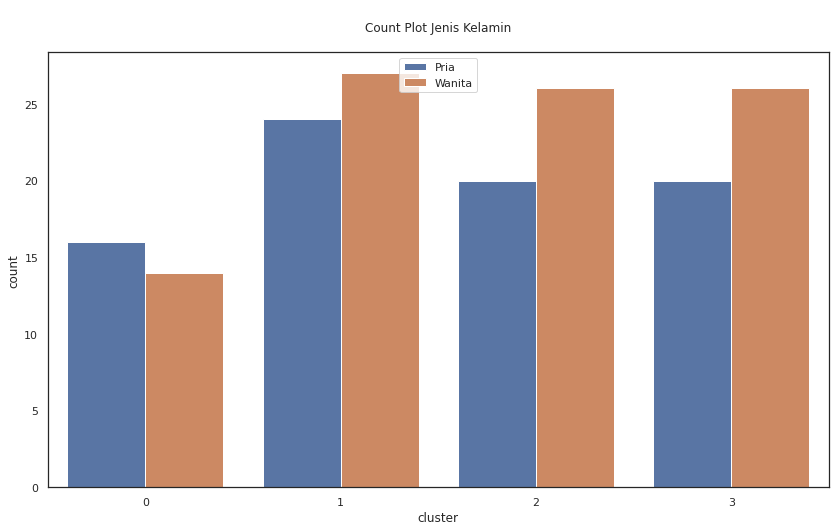

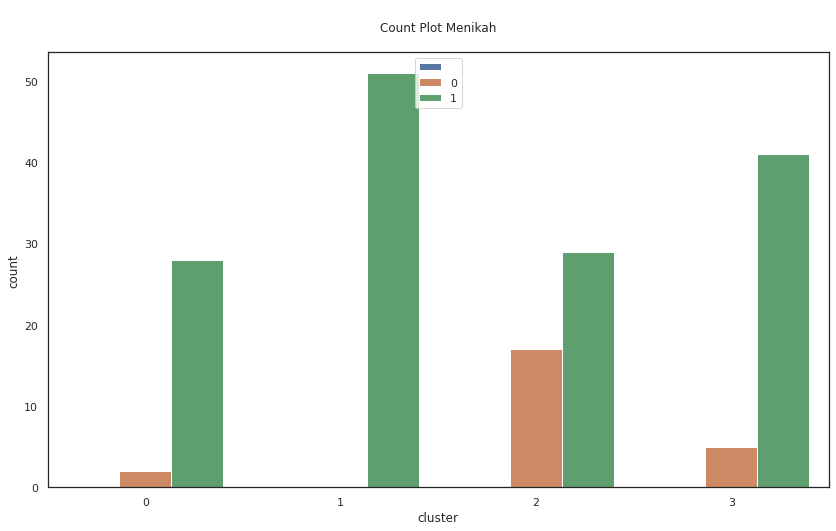

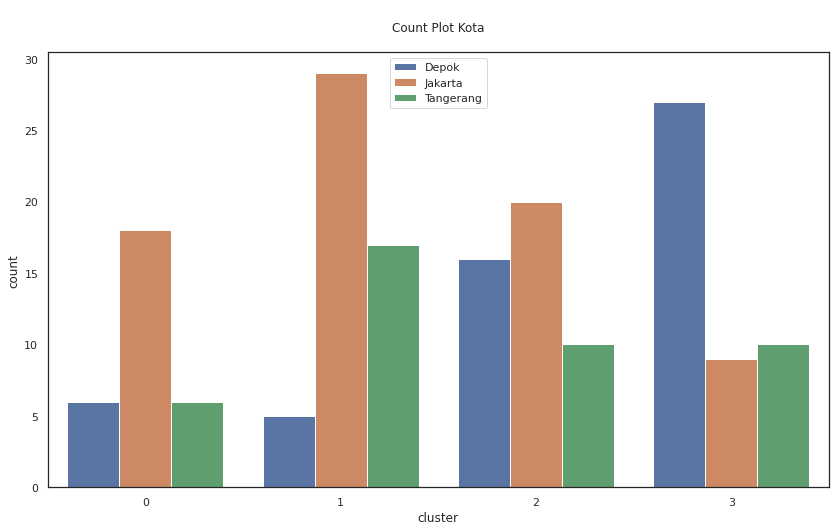

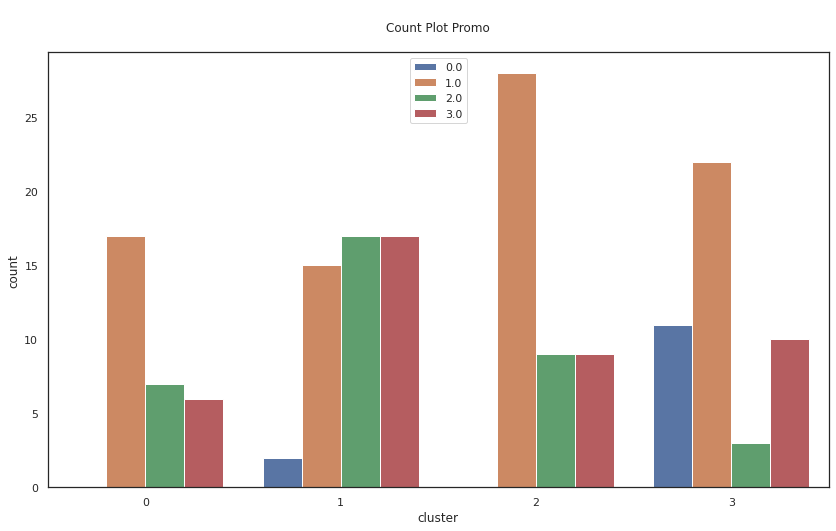

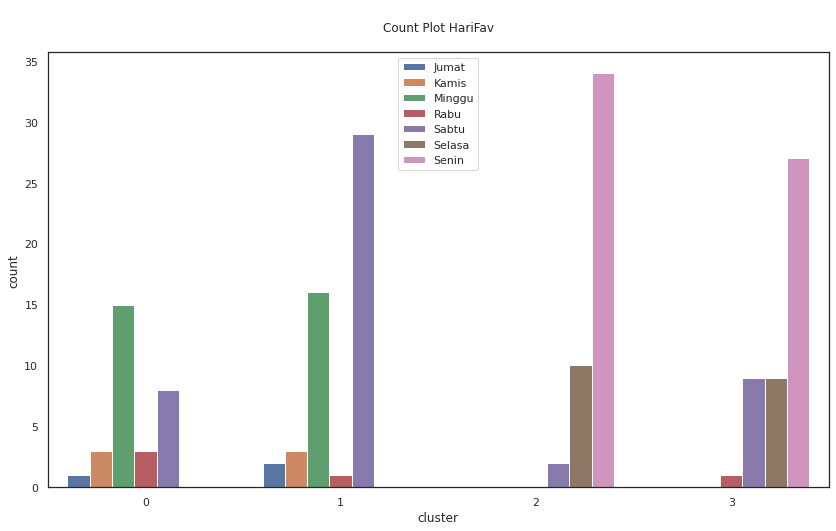

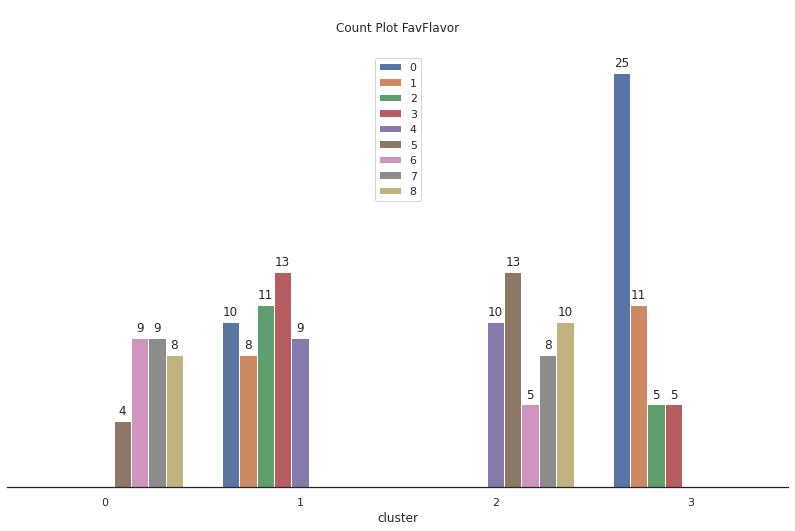

In [35]:
for i in kolom_kategorik:
    plt.figure(figsize=(14,8))
    ax = sns.countplot(data = df_final, x = 'cluster', hue = i )
    plt.title('\nCount Plot {}\n'.format(i), fontsize=12)
    ax.legend(loc="upper center")
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'),
    (p.get_x() + p.get_width() / 2., p.get_height()),
    ha = 'center',
    va = 'center',
    xytext = (0, 10),
    textcoords = 'offset points')

sns.despine(right = True,top = True, left = True)
ax.axes.yaxis.set_visible(False)
plt.show()

Menamakan Cluster

In [36]:
# Mapping nama kolom
df_final['Segmen'] = df_final['cluster'].map({
0: 'Silver Member',
1: 'Gold Member',
2: 'Diamond Member',
3: 'Diamond Super Member',
})

print(df_final.info())
print(df_final.head(10))

<class 'pandas.core.frame.DataFrame'>
Int64Index: 173 entries, 0 to 196
Data columns (total 11 columns):
 #   Column                Non-Null Count  Dtype   
---  ------                --------------  -----   
 0   Jenis Kelamin         173 non-null    category
 1   Umur                  173 non-null    int64   
 2   Pendapatan-per-bulan  173 non-null    int64   
 3   skor-pengeluaran      173 non-null    int64   
 4   Menikah               173 non-null    category
 5   Kota                  173 non-null    category
 6   Promo                 173 non-null    category
 7   HariFav               173 non-null    category
 8   FavFlavor             173 non-null    category
 9   cluster               173 non-null    uint16  
 10  Segmen                173 non-null    object  
dtypes: category(6), int64(3), object(1), uint16(1)
memory usage: 13.5+ KB
None
  Jenis Kelamin  Umur  Pendapatan-per-bulan  skor-pengeluaran Menikah  \
0        Wanita    49              13114754                52     

# Mencoba Menggunakan K-Means

In [37]:
from sklearn.cluster import KMeans

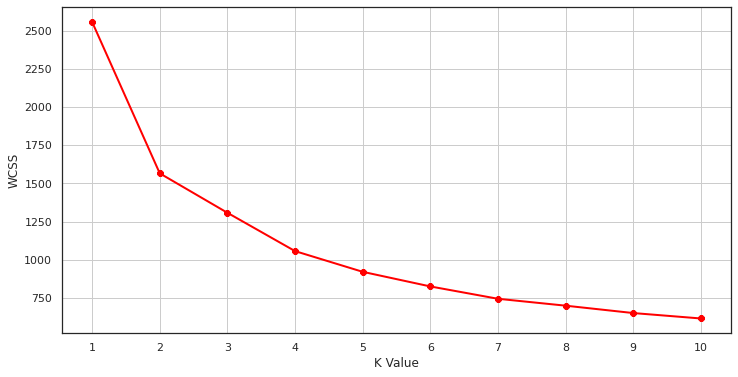

In [38]:
wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(df_model.iloc[:,1:])
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))    
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color="red", marker ="8")
plt.xlabel("K Value")
plt.xticks(np.arange(1,11,1))
plt.ylabel("WCSS")
plt.show()

In [39]:
from sklearn import cluster, datasets
random_state = 99

array([1, 0, 1, 0, 0, 1, 0, 1, 0, 0], dtype=int32)

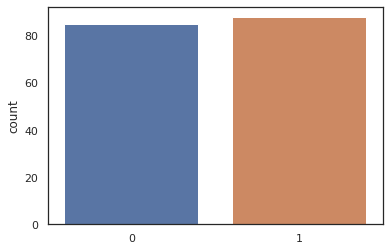

In [40]:
# k-means++ clustering http://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html
k = 2
kmPP = cluster.KMeans(n_clusters=k, init='k-means++', max_iter=300, tol=0.0001, random_state = random_state)
kmPP.fit(df_model)
C_kmpp = kmPP.predict(df_model)

sns.countplot(x=C_kmpp)
C_kmpp[:10]

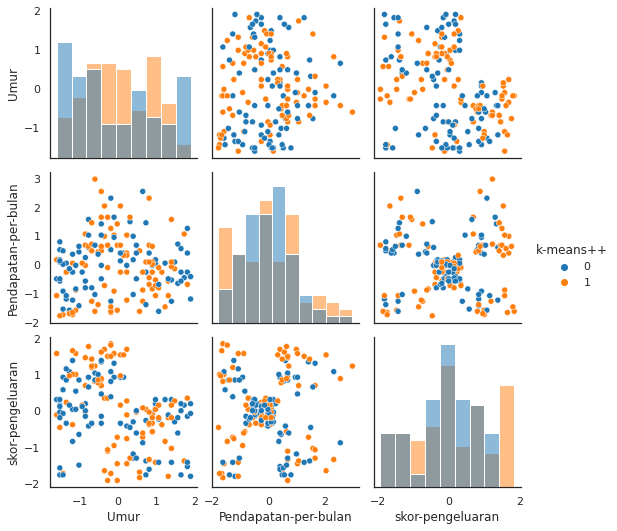

In [41]:
df_model['k-means++'] = C_kmpp
g = sns.pairplot(df_model[['Umur', 'Pendapatan-per-bulan','skor-pengeluaran' ,'k-means++']], \
                 hue="k-means++", diag_kind="hist", palette="tab10")

# Kesimpulan Akhir

* Cluster 0:
Rata-rata pendapatan per bulan cenderung menengah ke bawah dan rata-rata skor pengeluaran cenderung menengah ke atas.  Usia rata-rata adalah sekitar 50 tahun dan jenis kelamin di dominasi oleh pria.

* Cluster 1:
Rata-rata pendapatan per bulan cenderung menengah ke bawah dan skor pengeluaran menengah ke atas. Usia rata-rata adalah sekitar 45 - 50 tahun dan jenis kelamin di dominasi oleh wanita.

* Cluster 2:
Rata-rata pendapatan per bulan cenderung menengah ke atas dan rata-rata skor pengeluaran cenderung menengah ke atas. Usia rata-rata adalah sekitar 25 tahun dan jenis kelamin di dominasi oleh wanita.

* Cluster 3:
Rata-rata pendapatan per bulan cenderung menengah ke atas dan rata-rata skor pengeluarannya cenderung tinggi. Usia rata-rata adalah sekitar 30 tahun dan jenis kelamin di dominasi oleh wanita.

**Tips:**
Pada aplikasi di industri proses penentuan cluster yang optimum bisa dilakukan juga dengan melihat matriks evaluasi lainnya seperti sillhoute score dan callinski-harabaz score.

Selain itu penentuan jumlah cluster yang optimal juga perlu mepertimbangkan masukan dari tim yang akan menggunakan modelnya. Sehingga bisa menghasilkan cluster yang sesuai dengan kebutuhan mereka dan juga bagaimana cara mereka akan memperlakukan segmen-segmen ini.

Tantangan lainnya adalah jumlah data yang jauh lebih banyak dibanding dengan dataset yang kamu gunakan untuk latihan ini. Sehingga waktu pemrosesan datanya dan pembuatan modelnya akan menjadi lebih lama.